In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.close('all')

df = pd.read_csv('accidents_data.csv')

df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [2]:
# Finding all columns
for col in df.columns:
    print(col)
# it would not be feasible to put all weather conditions and combinations onto one graph
# it may be possible to include the combination conditions into one of the base conditions
# although for the current sake of simplicity, only the base conditions will be used for this analysis

ID
Severity
Start_Time
End_Time
Start_Lat
Start_Lng
End_Lat
End_Lng
Distance(mi)
Description
Number
Street
Side
City
County
State
Zipcode
Country
Timezone
Airport_Code
Weather_Timestamp
Temperature(F)
Wind_Chill(F)
Humidity(%)
Pressure(in)
Visibility(mi)
Wind_Direction
Wind_Speed(mph)
Precipitation(in)
Weather_Condition
Amenity
Bump
Crossing
Give_Way
Junction
No_Exit
Railway
Roundabout
Station
Stop
Traffic_Calming
Traffic_Signal
Turning_Loop
Sunrise_Sunset
Civil_Twilight
Nautical_Twilight
Astronomical_Twilight


In [3]:
# Questions
# What are the accident rates for different weather conditions?
# What time of day do accidents occur most often?
# Which state has the most accidents?
# Top 15 most accident prone streets/roads

In [4]:
print(df['Weather_Condition'].unique())

['Light Rain' 'Overcast' 'Mostly Cloudy' 'Snow' 'Light Snow' 'Cloudy' nan
 'Scattered Clouds' 'Clear' 'Partly Cloudy' 'Light Freezing Drizzle'
 'Light Drizzle' 'Haze' 'Rain' 'Heavy Rain' 'Fair' 'Drizzle' 'Fog'
 'Thunderstorms and Rain' 'Patches of Fog' 'Light Thunderstorms and Rain'
 'Mist' 'Rain Showers' 'Light Rain Showers' 'Heavy Drizzle' 'Smoke'
 'Light Freezing Fog' 'Light Freezing Rain' 'Blowing Snow'
 'Heavy Thunderstorms and Rain' 'Heavy Snow' 'Snow Grains' 'Squalls'
 'Light Fog' 'Shallow Fog' 'Thunderstorm' 'Light Ice Pellets' 'Thunder'
 'Thunder in the Vicinity' 'Fair / Windy' 'Light Rain with Thunder'
 'Heavy Thunderstorms and Snow' 'Light Snow Showers' 'Cloudy / Windy'
 'Ice Pellets' 'N/A Precipitation' 'Light Thunderstorms and Snow'
 'T-Storm' 'Rain / Windy' 'Wintry Mix' 'Partly Cloudy / Windy'
 'Heavy T-Storm' 'Sand' 'Light Rain / Windy' 'Widespread Dust'
 'Mostly Cloudy / Windy' 'Blowing Dust / Windy' 'Blowing Dust'
 'Volcanic Ash' 'Freezing Rain / Windy' 'Small Hail' 'W

In [104]:
weather_condition_df = df['Weather_Condition'].value_counts().head(12)
weather_condition_names = df['Weather_Condition'].value_counts().head(12).index.tolist()
weather_condition_values = df['Weather_Condition'].value_counts().head(12).tolist()

print(weather_condition_df)
print(weather_condition_names)
print(weather_condition_values)

Fair                1107194
Mostly Cloudy        363959
Cloudy               348767
Partly Cloudy        249939
Clear                173823
Light Rain           128403
Overcast              84882
Scattered Clouds      45132
Light Snow            43752
Fog                   41226
Haze                  36354
Rain                  31044
Name: Weather_Condition, dtype: int64
['Fair', 'Mostly Cloudy', 'Cloudy', 'Partly Cloudy', 'Clear', 'Light Rain', 'Overcast', 'Scattered Clouds', 'Light Snow', 'Fog', 'Haze', 'Rain']
[1107194, 363959, 348767, 249939, 173823, 128403, 84882, 45132, 43752, 41226, 36354, 31044]


In [98]:
total_accidents = df['Weather_Condition'].value_counts().sum()

total_general = 0
for i in weather_condition_values_raw:
    total_general += i

print(f'Total Number of Accidents in Dataset: {total_accidents} (100%)\n')
print(f'Number of Accidents Without Multiple Weather Conditions: {total_general} ({round((total_general/total_accidents)*100, 2)}%)')

Total Number of Accidents in Dataset: 2774706 (100%)

Number of Accidents Without Multiple Weather Conditions: 2654475 (95.67%)


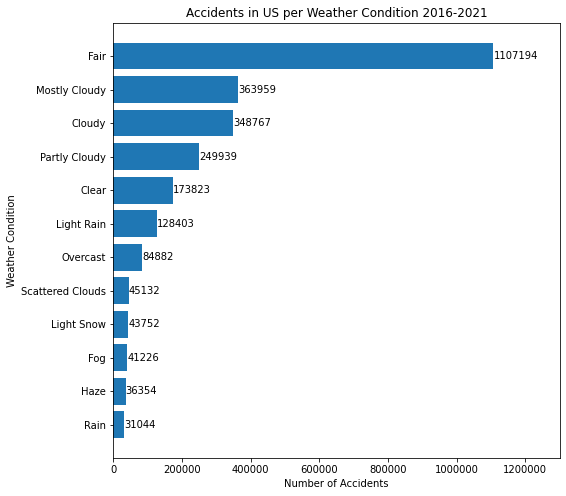

In [106]:
ypos = np.arange(len(weather_condition_names))
fig, ax = plt.subplots()
hbars = ax.barh(ypos, weather_condition_values, align='center')

ax.set_yticks(ypos, labels=weather_condition_names)
ax.invert_yaxis()
ax.set_xlabel('Number of Accidents')
ax.set_ylabel('Weather Condition')
ax.set_title('Accidents in US per Weather Condition 2016-2021')
ax.bar_label(hbars, fmt='%d')
ax.set_xlim(right=1300000)

fig.set_figheight(8)
fig.set_figwidth(8)

plt.ticklabel_format(axis='x', style='plain')
plt.show()

# note that the total number of accidents used in this figure
# is about 95.7% of the number of accidents in the dataset
# as it does not include accidents with multiple weather conditions